# Predictive Analysis of Strokes in Patients - Aashna Dorwal

In [87]:
import pandas as pd

In [183]:
df = pd.read_csv("./healthcare-dataset-stroke-data.csv")

df.head(10)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


## Question 1: Which gender has a higher susceptibility to strokes?

In [185]:
all_data = pd.read_csv('healthcare-dataset-stroke-data.csv')
all_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


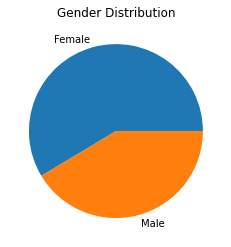

In [117]:
import pandas as pd
import matplotlib.pyplot as plt

filtered_data = all_data[all_data['gender'].isin(['Male', 'Female'])]

results = filtered_data.groupby('gender').size()
results.plot(kind='pie')
plt.ylabel('')
plt.xlabel('')
plt.title('Gender Distribution')

plt.show()

## Question 2: Is there a higher likelihood of stroke due to smoking?

In [134]:
results = all_data.groupby('smoking_status').sum()['stroke']
results

smoking_status
Unknown            47
formerly smoked    70
never smoked       90
smokes             42
Name: stroke, dtype: int64

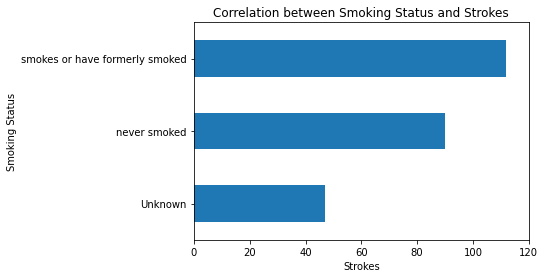

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

filtered_data = all_data[all_data['smoking_status'].isin(['Unknown','formerly smoked', 'smokes', 'never smoked'])]

# Combined 'formerly smoked' and 'smokes' into a single category
filtered_data['smoking_status'] = filtered_data['smoking_status'].replace(['formerly smoked', 'smokes'], 'smokes or have formerly smoked')

# Filtered out 'Unknown' category
# filtered_data = filtered_data[filtered_data['smoking_status'] != 'Unknown']

results = filtered_data.groupby('smoking_status').sum()['stroke']
results.plot(kind='barh')

plt.ylabel('Smoking Status')
plt.xlabel('Strokes')
plt.title('Correlation between Smoking Status and Strokes')

plt.xlim(0, 120)


plt.show()

## Question 3: Does body mass index (BMI) have an impact on the likelihood of strokes?

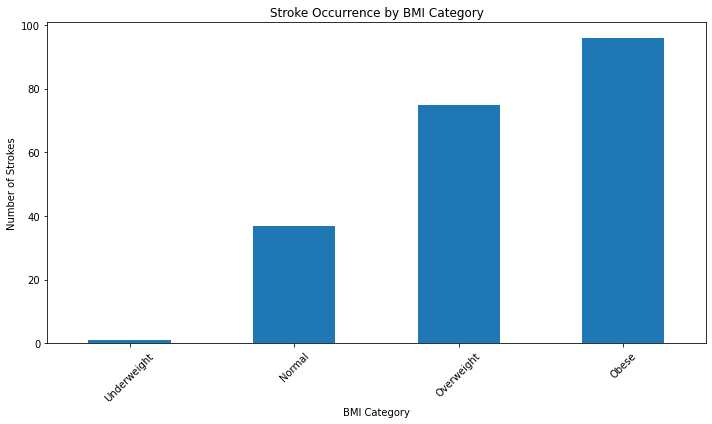

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Defining the BMI ranges
bins = [0, 18.5, 25, 30, float('inf')]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese']

# New column with BMI categories
all_data['bmi_category'] = pd.cut(all_data['bmi'], bins=bins, labels=labels)

# Grouping by BMI category and calculate stroke occurrences
bmi_groups = all_data.groupby('bmi_category')
stroke_by_bmi = bmi_groups['stroke'].sum()

stroke_by_bmi.plot(kind='bar', figsize=(10, 6))
plt.xlabel('BMI Category')
plt.ylabel('Number of Strokes')
plt.title('Stroke Occurrence by BMI Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Question 4: Do individuals living in different residence types have different rates of strokes?

In [27]:
import pandas as pd

# Assuming you have the data stored in a DataFrame called 'data'
# 'residence_type' is the column containing residence types (e.g., 'Urban' or 'Rural')
# 'strokes' is the column containing stroke occurrences (e.g., 0 for no stroke, 1 for stroke)

# Group the data by residence type and calculate the stroke rate for each group
stroke_rates_by_residence = all_data.groupby('Residence_type')['stroke'].mean()

# Print the stroke rates for each residence type
print(stroke_rates_by_residence)

Residence_type
Rural    0.045346
Urban    0.052003
Name: stroke, dtype: float64


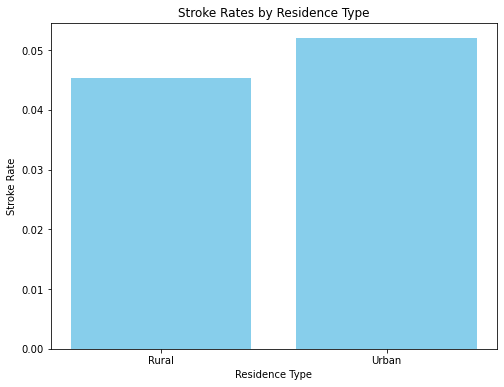

In [48]:
import matplotlib.pyplot as plt

# Create a dictionary with the stroke rates for each residence type
data = {
    'Residence Type': ['Rural', 'Urban'],
    'Stroke Rate': [0.045346, 0.052003]
}

# Convert the data dictionary into a pandas DataFrame
df = pd.DataFrame(data)

# Create the stacked bar chart
plt.figure(figsize=(8, 6))
plt.bar(df['Residence Type'], df['Stroke Rate'], color='skyblue')
plt.xlabel('Residence Type')
plt.ylabel('Stroke Rate')
plt.title('Stroke Rates by Residence Type')

# Display the chart
plt.show()





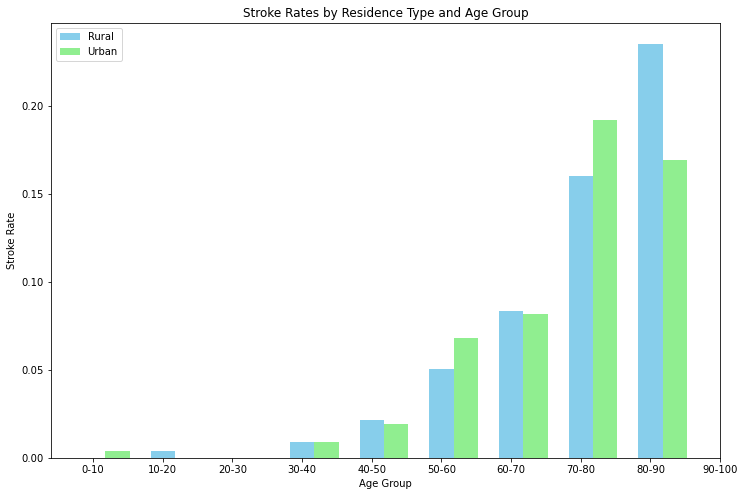

In [86]:
import matplotlib.pyplot as plt
import numpy as np

age_groups = range(0, 101, 10)
stroke_rates = all_data.groupby(['Residence_type', pd.cut(all_data['age'], bins=age_groups)])['stroke'].mean().unstack().T

residence_types = stroke_rates.columns

plt.figure(figsize=(12, 8))

colors = ['skyblue', 'lightgreen']
bar_width = 0.35

for i, residence_type in enumerate(residence_types):
    x = np.arange(len(age_groups[:-1]))  # X-axis values for the bars
    plt.bar(x + i * bar_width, stroke_rates[residence_type], width=bar_width, color=colors[i])

age_group_labels = [f'{start}-{end}' for start, end in zip(age_groups[:-1], age_groups[1:])]
plt.xticks(np.arange(len(age_group_labels)), age_group_labels)

plt.xlabel('Age Group')
plt.ylabel('Stroke Rate')
plt.title('Stroke Rates by Residence Type and Age Group')

plt.legend(residence_types)
plt.show()


